In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
ins = pd.read_csv('/train.csv')
ins.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0


In [5]:
ins.corr()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,1.000000,0.003691,0.007092,-0.004407,0.010654,0.008446,-0.000352,-0.008613,0.011429,0.009792,-0.011271,-0.004461,0.011416,0.000758,0.015521,0.007268,-0.005178,-0.003723,0.005597,-0.001712,-0.002246,0.000849,-0.000065,0.009383,-0.009979,0.011378,0.019111,-0.002702,0.008390,-0.000844,-0.008908,0.005677,-0.000356,-0.011063,-0.005020,0.017726,0.018167,0.000729,0.007828,-0.008413,-0.011048,-0.000904,0.016853,0.004185,-0.017863,-0.001046,0.002542,-0.012537,0.005014,-0.002679,-0.003229,0.011309,0.000291,-0.009552,0.010973,-0.003668,-0.005532,0.008054,-0.006516
target,0.003691,1.000000,0.026291,-0.002576,0.004492,0.024842,0.039836,-0.045957,0.038645,0.034819,-0.018598,-0.004105,-0.008644,0.007759,-0.006010,0.000762,-0.033874,-0.021444,0.025350,0.014209,0.025727,0.039107,0.033784,0.002107,-0.048847,0.019709,0.040643,0.029573,0.026105,-0.025944,-0.012222,-0.015970,0.015290,-0.005936,0.001718,0.045750,0.067937,0.001931,0.029557,0.014626,0.003379,0.010155,0.014294,0.001040,0.008739,0.007191,-0.009133,-0.001141,-0.005535,-0.004114,0.000485,-0.000546,-0.001128,0.000876,-0.000399,0.005159,-0.003837,-0.014076,0.006755
ps_ind_01,0.007092,0.026291,1.000000,-0.009331,0.218889,0.062986,0.012297,-0.273815,-0.002211,0.199596,0.156900,0.014417,-0.020638,-0.024456,-0.001618,-0.022936,0.126514,0.039964,0.110119,-0.120306,0.101904,0.180480,0.141065,-0.045601,-0.114448,0.043596,0.073430,0.204650,0.066090,-0.001155,0.128810,-0.089311,0.013469,0.013593,0.004147,0.152199,0.091962,0.031399,-0.058329,-0.002504,-0.000308,-0.019996,-0.004921,-0.005393,0.001778,0.001502,0.007467,0.009224,0.003403,-0.002276,0.011496,-0.010312,-0.017920,-0.006691,-0.006808,-0.010941,-0.006185,0.015115,-0.007050
ps_ind_02_cat,-0.004407,-0.002576,-0.009331,1.000000,-0.072054,0.151255,0.000202,-0.118569,0.014541,0.029369,0.104713,-0.006528,0.006852,-0.011437,0.002370,-0.006596,0.008327,0.004254,-0.010894,0.004466,0.065666,0.072445,0.074876,0.007185,0.046668,-0.003558,-0.074114,-0.026446,-0.010417,-0.004639,-0.002925,0.013173,0.019522,0.026506,0.006452,-0.116859,-0.077400,-0.006817,-0.002872,0.003620,-0.006642,-0.001187,-0.000262,-0.008497,-0.003206,-0.007571,0.004731,0.007288,0.004628,0.016054,-0.000176,-0.006199,0.008912,-0.003170,-0.006506,-0.001338,0.002546,-0.000926,-0.002351
ps_ind_03,0.010654,0.004492,0.218889,-0.072054,1.000000,-0.101233,0.048030,-0.036410,-0.077454,0.012361,0.120697,0.007700,-0.002188,-0.012162,0.000461,-0.008332,0.161592,-0.010612,0.016419,0.001088,0.012043,0.049669,0.004102,-0.016282,-0.040666,0.092559,0.064330,0.142377,-0.008569,0.065336,0.003415,-0.006610,-0.014063,-0.018942,-0.075601,0.078289,0.042128,0.008532,-0.048801,-0.000605,0.001667,-0.001388,-0.012641,-0.004603,-0.003344,0.010890,0.002674,-0.008320,0.003603,-0.001504,0.002961,-0.003235,-0.007944,0.001727,-0.003431,0.001008,0.008572,-0.001560,-0.012685
ps_ind_04_cat,0.008446,0.024842,0.062986,0.151255,-0.101233,1.000000,0.012076,-0.288372,0.305274,0.044075,-0.021558,-0.005576,0.011489,-0.004140,0.002963,0.000600,0.083760,0.016336,0.011426,-0.027108,0.036210,0.077251,0.072086,0.002591,-0.001706,0.024544,-0.041826,0.067504,0.031825,0.039606,-0.012713,-0.038289,0.016668,-0.011326,0.063107,-0.096906,-0.033363,-0.000073,0.037329,-0.001457,-0.003779,-0.011525,0.005286,0.002746,0.011285,0.0

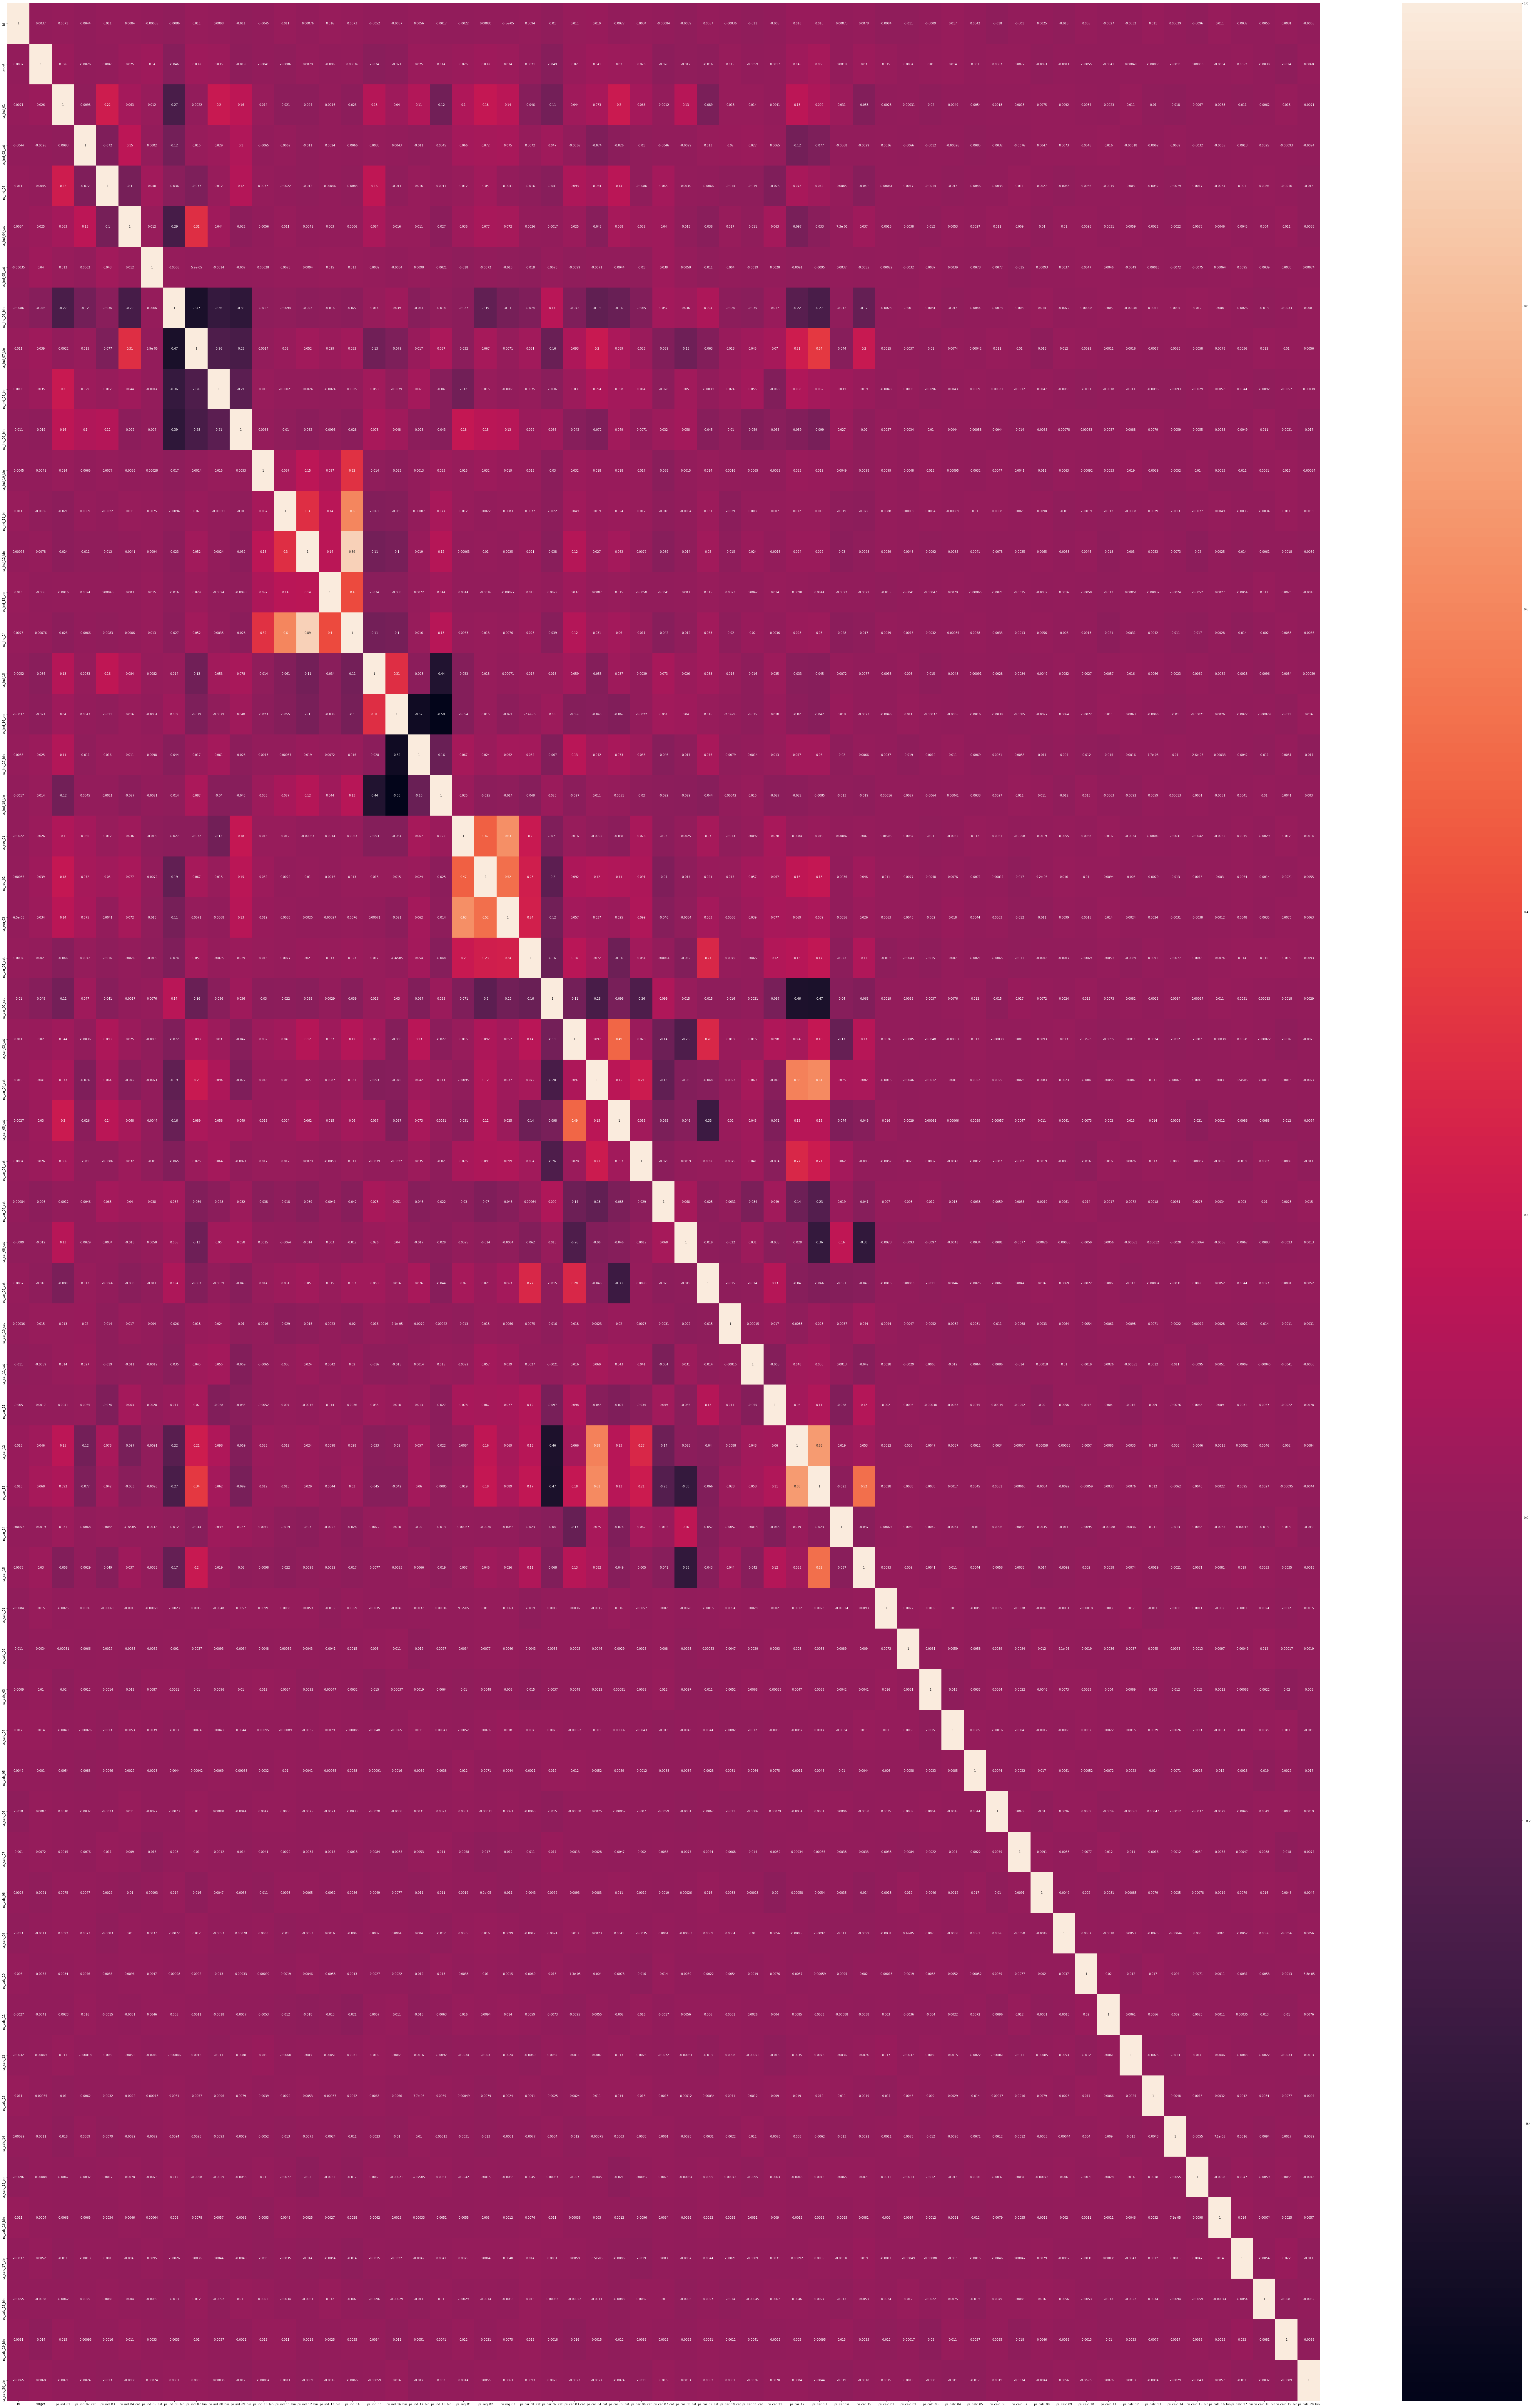

In [6]:
plt.figure(figsize=(100,150))
sb.heatmap(ins.corr(),annot=True)

In [7]:
#Create a frame that stores multiple data 
data = []
for f in ins.columns:
    #Define the role
    if f == 'target':
        role = 'target'
    elif f =='id':
        role = 'id'
    else:
        role = 'input'
    
    #Define the type of data 
    if 'bin' in f or f =='target':
        type_of_data = 'binary'
    elif 'cat' in f or f == 'id':
        type_of_data = 'nominal'
    elif ins[f].dtype == 'float64':
        type_of_data = 'continuous'
    elif ins[f].dtype == 'int64':
        type_of_data = 'ordinal'
        
        #Define the keep
    keep = True
    if f =='id':
        keep = False
    
    #Defining the dtype
    dtype = ins[f].dtype
    type_of_data
    #Creating a Dict that contains all the metadata for the variable 
    f_dict = {
        'varname': f,
        'role': role,
        'type_of_data': type_of_data,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns = ['varname', 'role', 'type_of_data', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [8]:
meta

,role,type_of_data,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [9]:
meta.loc[(meta.type_of_data == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [10]:
pd.DataFrame({'count' : meta.groupby(['role', 'type_of_data'])['role'].size()}).reset_index()

,role,type_of_data,count
0,id,nominal,1
1,input,binary,17
2,input,continuous,12
3,input,nominal,14
4,input,ordinal,14
5,target,binary,1


In [11]:
v = meta[(meta.type_of_data == 'continuous') & (meta.keep)].index # shows only continuous data
ins[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_13,ps_calc_14
count,16285.000000,16285.000000,16285.000000,16285.000000,16285.000000,16285.000000,16285.000000,16285.000000,16285.000000,16285.000000,16284.000000,16284.000000
mean,0.613135,0.441001,0.553376,0.380171,0.813841,0.277700,3.064699,0.448609,0.452281,0.451170,2.887374,7.546610
std,0.287402,0.404983,0.794809,0.059659,0.227606,0.355012,0.738256,0.287731,0.286189,0.288327,1.680919,2.749279
min,0.000000,0.000000,-1.000000,0.141421,0.313241,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670666,0.332265,2.828427,0.200000,0.200000,0.200000,2.000000,6.000000
50%,0.700000,0.300000,0.721976,0.374166,0.765268,0.368782,3.316625,0.500000,0.500000,0.500000,3.000000,7.000000
75%,0.900000,0.600000,1.007472,0.400000,0.904523,0.396485,3.605551,0.700000,0.700000,0.700000,4.000000,9.000000
max,0.900000,1.800000,2.947457,1.264911,2.707275,0.591608,3.741657,0.900000,0.900000,0.900000,11.000000,20.000000


In [12]:
o = meta[(meta.type_of_data == 'ordinal') & (meta.keep)].index # shows only ordinal data
ins[o].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12
count,16285.000000,16285.000000,16285.000000,16285.000000,16285.000000,16285.000000,16285.000000,16285.000000,16285.000000,16285.000000,16285.000000,16285.000000,16285.000000,16285.000000
mean,1.905741,4.425668,0.012527,7.323058,2.351121,2.377525,1.891372,7.693215,3.004176,9.218975,2.332944,8.412711,5.450660,1.446546
std,1.984964,2.701193,0.130529,3.553357,0.827861,1.109653,1.145807,1.341597,1.409292,1.463155,1.251351,2.877730,2.327883,1.209526
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000
max,7.000000,11.000000,3.000000,13.000000,3.000000,5.000000,6.000000,10.000000,8.000000,12.000000,7.000000,21.000000,16.000000,8.000000


In [13]:
b = meta[(meta.type_of_data == 'binary') & (meta.keep)].index #shows only binary data
ins[b].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,16285.000000,16285.000000,16285.000000,16285.000000,16285.000000,16285.000000,16285.000000,16285.000000,16285.000000,16285.000000,16285.000000,16285.000000,16284.000000,16284.000000,16284.000000,16284.000000,16284.000000,16284.000000
mean,0.037703,0.395272,0.255266,0.163033,0.186429,0.000430,0.001904,0.009272,0.000921,0.660424,0.122505,0.148726,0.122329,0.623127,0.555453,0.293847,0.359862,0.152235
std,0.190484,0.488924,0.436024,0.369408,0.389465,0.020729,0.043590,0.095848,0.030336,0.473580,0.327879,0.355829,0.327675,0.484618,0.496931,0.455537,0.479975,0.359260
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
from collections import Counter
Counter(ins.target)

Counter({0: 15671, 1: 614})

In [15]:
"""as data set is imbalanced we can make two approaches to solve the problem step-1 : we can do over-sampling to improvise the target output-1 to increase step-1 : we can do the under-sampling of target-0 to reduce the no. of data """

'as data set is imbalanced we can make two approaches to solve the problem step-1 : we can do over-sampling to improvise the target output-1 to increase step-1 : we can do the under-sampling of target-0 to reduce the no. of data '

In [16]:
#random undersampling to balance the ins distribution
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [17]:
X = ins.iloc[ : ,[2,3,4,5,6,7,8,9,10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58]]
y = ins.target

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=15)

In [19]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [20]:
X_train_smote,y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)

ValueError: ignored

### Decision Tree

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10)

In [26]:
X_train

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
4500,3,3,7,1,6,0,0,1,0,0,0,0,0,0,2,0,1,0,0.7,0.2,0.636396,11,1,-1,0,-1,1,1,1,1,1,70,3,0.374166,0.836092,0.386005,3.464102,0.6,0.1,0.2,3,3,10,3,9,1,8,4,0,1.0,10.0,0.0,1.0,0.0,0.0,0.0,1.0
6773,5,2,6,1,0,0,0,1,0,0,0,0,0,0,13,1,0,0,0.8,1.0,1.189800,11,1,1,0,1,0,1,1,2,1,34,2,0.400000,0.776462,-1.000000,3.316625,0.8,0.0,0.9,2,3,10,3,9,2,9,7,1,6.0,9.0,0.0,1.0,1.0,1.0,0.0,0.0
9643,7,1,10,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.8,0.7,0.902774,4,1,-1,0,1,1,1,1,0,1,40,2,0.400000,0.853203,0.385616,3.605551,0.7,0.8,0.4,4,1,8,4,9,2,5,2,0,1.0,15.0,0.0,0.0,1.0,0.0,0.0,0.0
8883,0,1,4,0,0,0,1,0,0,0,0,0,0,0,2,0,0,1,0.3,0.0,-1.000000,7,1,-1,1,-1,11,1,1,0,1,104,2,0.489898,1.049055,0.444635,3.162278,0.6,0.5,0.2,2,3,7,3,11,3,9,4,2,3.0,14.0,0.0,1.0,1.0,0.0,0.0,0.0
5184,5,1,3,1,0,0,1,0,0,0,0,0,0,0,6,1,0,0,0.9,0.7,0.937083,6,0,-1,0,0,10,1,1,0,1,28,3,0.374166,0.701695,0.382099,2.449490,0.3,0.5,0.6,3,3,8,4,8,4,5,6,2,3.0,9.0,0.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11633,1,1,2,0,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.5,0.3,0.644205,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316228,0.641280,0.368511,3.000000,0.7,0.3,0.3,5,1,8,2,11,5,8,6,0,3.0,5.0,0.0,1.0,1.0,0.0,0.0,0.0
1344,1,1,7,0,0,0,0,0,1,0,0,0,0,0,12,1,0,0,0.9,0.2,0.532095,7,1,-1,2,-1,11,1,1,2,1,14,0,0.374166,0.685354,0.430232,3.000000,0.3,0.0,0.8,3,2,9,3,8,2,8,4,5,2.0,14.0,0.0,1.0,0.0,0.0,0.0,1.0
12815,3,1,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.7,0.3,0.769334,11,1,-1,0,-1,7,1,1,2,1,96,3,0.400000,0.820527,0.427200,3.162278,0.7,0.6,0.9,2,2,10,2,11,1,11,6,2,3.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0
7293,4,1,3,0,0,0,0,1,0,0,0,0,0,0,2,0,1,0,0.9,0.5,0.818153,11,1,0,0,0,0,1,1,2,1,78,3,0.400000,0.940442,0.328786,3.741657,0.4,0.3,0.8,3,1,7,2,11,5,11,1,0,2.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
y_train.shape

(12213,)

In [24]:
X_test.shape

(4072, 57)

In [25]:
y_test.shape

(4072,)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9184158060975337

In [ ]:
model.get_depth()

46

In [ ]:
model = DecisionTreeClassifier(max_depth=3) # max.depth
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.963889697811429

In [ ]:
model = DecisionTreeClassifier(max_depth=8) # max.depth
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9636880894245201

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    172116
           1       0.11      0.00      0.00      6448

    accuracy                           0.96    178564
   macro avg       0.54      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564



In [ ]:
confusion_matrix(y_test,y_predict)

array([[172075,     41],
       [  6443,      5]], dtype=int64)

IndexError: list index out of range

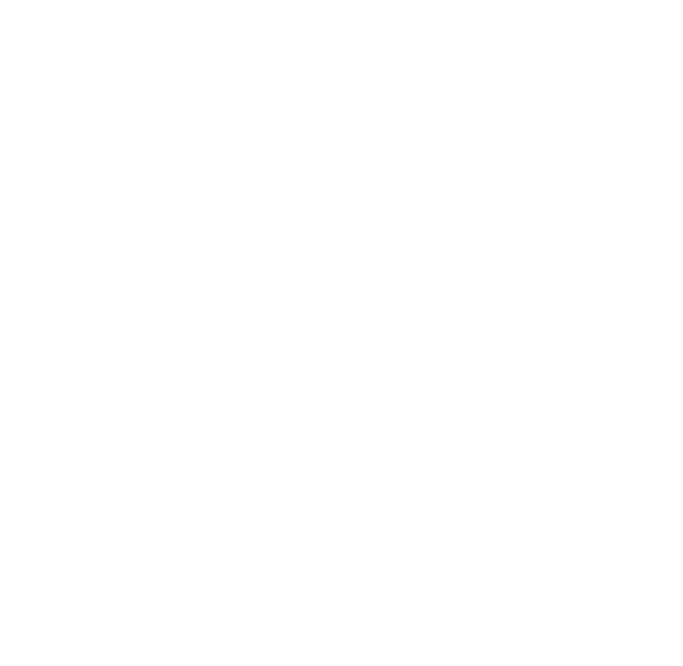

In [ ]:
from sklearn import tree
from matplotlib import rcParams
rcParams['figure.figsize']=12,12
dt = tree.DecisionTreeClassifier()
dt.fit(X,y)
tree.plot_tree(dt,
               class_names=['id'],
               feature_names=['target'],
              filled=True,max_depth=2)
plt.show()